## Lending Club Case Study

In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the csv file
df = pd.read_csv('./loan/loan.csv')

C:\Users\91949\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Shape of the data frame
df.shape

(39717, 111)

In [5]:
#Data types of the columns in the data frame
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
#Number of columns where all the values are null
len(df.columns[(df.isnull().sum() == df.shape[0])])

54

In [7]:
#Dropping the columns where all the values are null
df = df.loc[:,~(df.isnull().sum() == df.shape[0])]
df.shape

(39717, 57)

In [8]:
# Dropping the columns and rows where number of missing values are greater than 80%
df = df.loc[:,~(df.isnull().sum()/ len(df) * 100 > 80)]

In [9]:
#Checking the number of null values again in each column
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
#Dropping the records where the loan is current
df = df[~(df['loan_status'] == 'Current')]
df.reset_index(inplace=True)
len(df)

38577

In [11]:
#Checking the number of null values again in each column
df.isnull().sum()

index                             0
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line            

In [12]:
#Dropping customer behaviour variables
df = df.drop(['issue_d', 'pymnt_plan', 'url', 'desc', 'delinq_2yrs', 'mths_since_last_delinq', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'earliest_cr_line', 'total_acc', 'open_acc', 'tax_liens'], axis=1)

In [13]:
df.isnull().sum()

index                     0
id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2386
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
title                    11
zip_code                  0
addr_state                0
dti                       0
inq_last_6mths            0
pub_rec                   0
initial_list_status       0
policy_code               0
application_type          0
dtype: int64

In [14]:
#Imputing the null values
#Checking the mode values for title, employment title and employment length
df['emp_title'].mode()[0]
df['emp_title'] = df['emp_title'].fillna(df['emp_title'].mode()[0])
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])
df.isnull().sum()

index                  0
id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
zip_code               0
addr_state             0
dti                    0
inq_last_6mths         0
pub_rec                0
initial_list_status    0
policy_code            0
application_type       0
dtype: int64

In [15]:
#Converting employment length to float
df['emp_length'].value_counts()
df['emp_length'] = df['emp_length'].apply(lambda x: x[0:2] if '+' in x  else x)
df['emp_length'] = df['emp_length'].apply(lambda x: str(0.5) if '<' in x  else x)
df['emp_length'] = df['emp_length'].apply(lambda x: float(x[0]) if (len(x) == 7) | (len(x) == 6)  else float(x))
df['emp_length'].value_counts()

10.0    9521
0.5     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [16]:
#Removing % symbol and converting interest rate to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(x[0: -1]))
df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
17.46      1
16.71      1
21.48      1
20.52      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [17]:
#Checking the data types for each of the columns
df.dtypes

index                    int64
id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                    float64
inq_last_6mths           int64
pub_rec                  int64
initial_list_status     object
policy_code              int64
application_type        object
dtype: object

In [18]:
#Binning loan amount to 4 values 'L', 'M', 'H', 'VH'
df['loan_amnt_bin'] = pd.qcut(df['loan_amnt'], [0, 0.25, 0.5, 0.75, 1], labels=['L', 'M', 'H', 'VH'])
df['loan_amnt_bin'].value_counts()
# df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], np.linspace(df['loan_amnt'].min(), df['loan_amnt'].max(), 5), labels=['L', 'M', 'H', 'VH'])
# df['loan_amnt_bin'].value_counts()

H     10645
L      9664
M      9648
VH     8620
Name: loan_amnt_bin, dtype: int64

In [19]:
#Binning interest rates to 4 values 'L', 'M', 'H', 'VH'
df['int_rate_bin'] = pd.qcut(df['int_rate'], [0, 0.25, 0.5, 0.75, 1], labels=['L', 'M', 'H', 'VH'])
df['int_rate_bin'].value_counts()

L     9808
VH    9643
H     9617
M     9509
Name: int_rate_bin, dtype: int64

In [20]:
#Binning installments to 4 values 'L', 'M', 'H', 'VH'
df['installment_bin'] = pd.qcut(df['installment'], [0, 0.25, 0.5, 0.75, 1], labels=['L', 'M', 'H', 'VH'])
df['installment_bin'].value_counts()

L     9662
H     9650
VH    9637
M     9628
Name: installment_bin, dtype: int64

In [21]:
#Binning annual income to 4 values 'L', 'M', 'H', 'VH'
df['annual_inc_bin'] = pd.qcut(df['annual_inc'], [0, 0.25, 0.5, 0.75, 1], labels=['L', 'M', 'H', 'VH'])
df['annual_inc_bin'].value_counts()

H     9700
L     9698
M     9591
VH    9588
Name: annual_inc_bin, dtype: int64

In [22]:
#Binning dti to 4 values 'L', 'M', 'H', 'VH'
df['dti_bin'] = pd.qcut(df['dti'], [0, 0.25, 0.5, 0.75, 1], labels=['L', 'M', 'H', 'VH'])
df['dti_bin'].value_counts()

L     9651
H     9650
M     9649
VH    9627
Name: dti_bin, dtype: int64

In [23]:
#Converting loan status from a categorical variable to a numerical variable
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [24]:
#Checking the average default rate in the given data set
df['loan_status'].mean()

0.14586411592399617

### We find the default rate for the data set to be around 14.6%

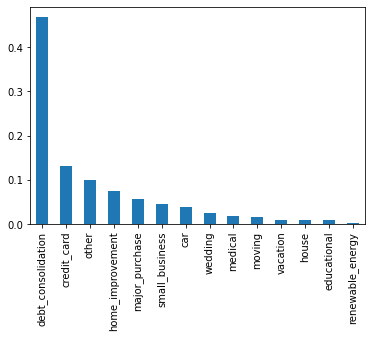

In [25]:
#Plotting the purposes for taking loan
(df['purpose'].value_counts() / len(df)).plot.bar()
plt.show()

#### We find that debt consolidation loan type to be the top purpose of taking loan at approximately more than 45%, next top 4 reasons ranging around the 10 % margin

In [26]:
(df['purpose'].value_counts() / len(df)).sort_values(ascending=False)[0:7].sum()

0.9131088472405837

#### We can see that  the top 7 purposes of loans constitute about 91% of the total loans by count, so we can use them for further analysis.

In [27]:
#We create a new dataframe containing the top 7 purposes of loans based on their total count
df_top_seven_purp = df[df['purpose'].isin(list(df['purpose'].value_counts().sort_values(ascending=False)[0:7].keys()))]
df_top_seven_purp.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,inq_last_6mths,pub_rec,initial_list_status,policy_code,application_type,loan_amnt_bin,int_rate_bin,installment_bin,annual_inc_bin,dti_bin
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,1,0,f,1,INDIVIDUAL,L,M,L,L,VH
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,5,0,f,1,INDIVIDUAL,L,VH,L,L,L
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,2,0,f,1,INDIVIDUAL,L,VH,L,L,M
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,1,0,f,1,INDIVIDUAL,H,H,H,M,VH
5,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,1,0,f,1,INDIVIDUAL,M,VH,M,M,VH


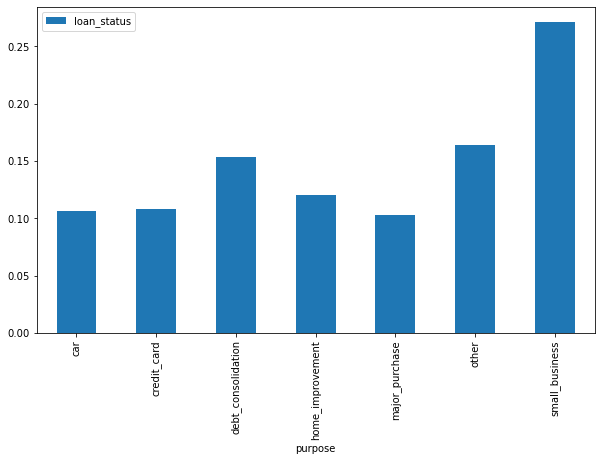

In [28]:
#Plotting purpose against default rate
pd.pivot_table(df_top_seven_purp, index='purpose', values='loan_status', aggfunc=np.mean).plot.bar(figsize=(10,6))
plt.show()
# pd.pivot_table(df, index='purpose', values='loan_status', aggfunc=np.mean).sort_values(ascending=False, by='loan_status')

#### We find that small_business has the highest default rate above 25% among the top 7 loan purposes, another interesting thing we find is that debt consolidation which has significantly higher count also has about 15% default rate which is similar to the mean default rate of the dataset, we need further analysis to break this down.

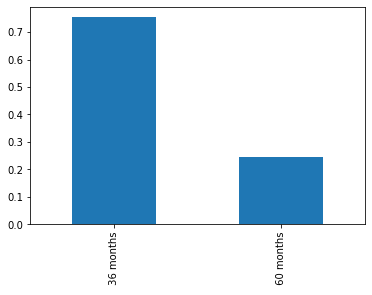

In [29]:
#Looking at the terms of the loans
(df['term'].value_counts() / len(df)).plot.bar()
plt.show()

#### We find about 75% of loan terms to be of 36 months and rest to be of 60 months

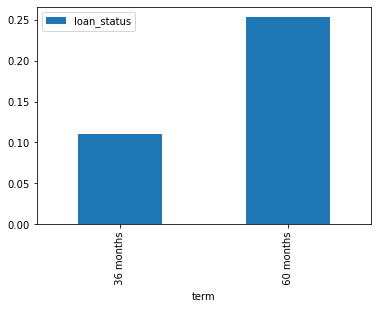

In [30]:
# Looking at the default rates for each term
pd.pivot_table(df, index='term', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

#### Interestingly eventhough 60 months are fewer in count they have much higher default rate compared to 36 months, standing at nearly 25% and just above 10% respectively

### <i>Now lets see the default rates for top 7 loan purposes in respect to the loan term</i>

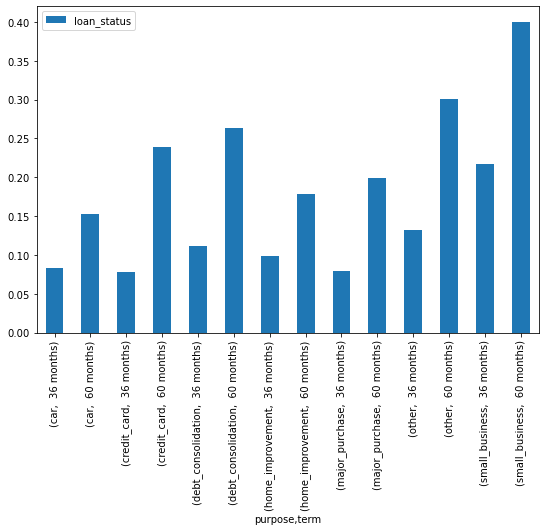

In [31]:
pd.pivot_table(df_top_seven_purp, index=['purpose', 'term'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()
# pd.pivot_table(df, index=['purpose', 'term'], values='loan_status', aggfunc=np.mean).sort_values(ascending=False, by='loan_status')

### We find that there is a huge difference, almost double in default rate among the top 7 purposes of loans based on the loan term. With small business containing the highest at nearly 40% and other loans and debt consolidation nearly 30% default rates in 60 months, more than double of their 36 month counterparts, eventhough 36 month term constitutes for the 75% of the loans dispatched.
### When the loan term is 60 months we find that there is a huge jump in default rate.

### <i>Let us examine the data set further.</i>

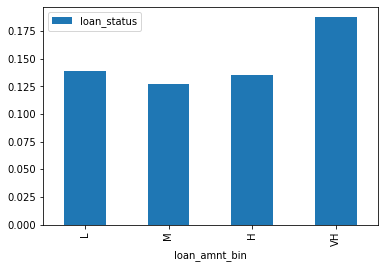

In [32]:
#Lets see the default rate across loan amounts
pd.pivot_table(df, index='loan_amnt_bin', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

#### We find that the default rate is the highest among very high loan amounts

### <i>Now let's see the distribution for the default rate across loan amounts for the loan terms</i>

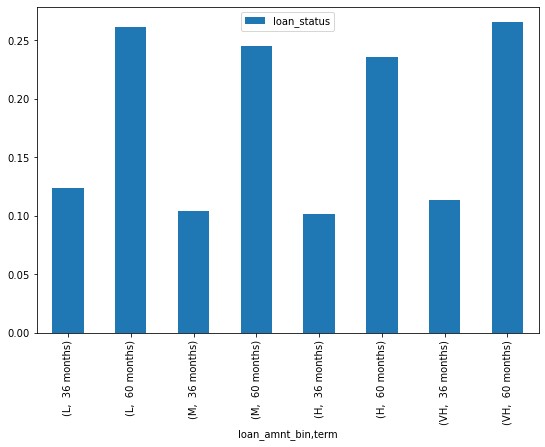

In [33]:
pd.pivot_table(df, index=['loan_amnt_bin', 'term'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

#### As we expected the default rate is highest among the 60 month term across all the loan amounts.

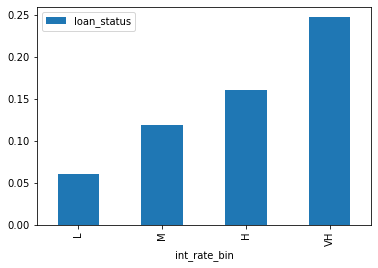

In [34]:
#Lets see the default rate for interest rates
pd.pivot_table(df, index='int_rate_bin', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

### We see a linear rise in default rate as the interest rate increases, with very high interest rate showing almost 25% default rate, lets analyse further.

### <i>Now let's see the distribution for the default rate for loan amounts across interest rates</i>

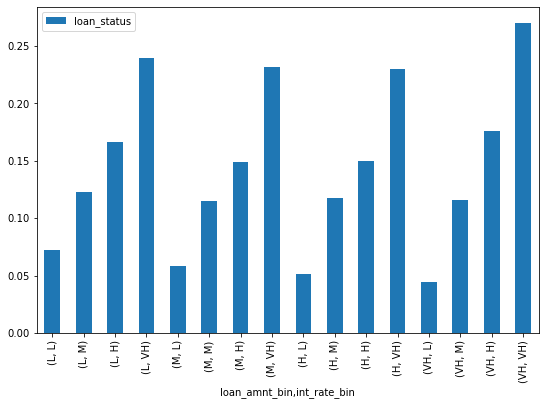

In [35]:
#Default rates for loan amounts for different interest rates
pd.pivot_table(df, index=['loan_amnt_bin', 'int_rate_bin'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

#### We can see that as the interest rate increases the default rate jumps linearly, with the highest for very high loans with very high interest.
#### Interestingly we see an inverse trend also for low interest rates the default rate gradually decreases from less loan amounts to very high loan amount. Looking at this we can assume that it is not the higher loan amounts that are causing the higher default rates, very high loan amounts for low interest rate actually has lower default rate, rather higher loan amounts with higher interest rates that is the reason for this trend.

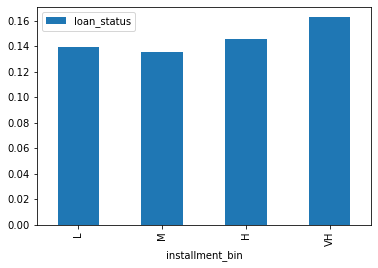

In [36]:
#Lets see the default rate across the installments distribution
pd.pivot_table(df, index='installment_bin', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

### We find default rate across this distribution to be almost evenly spread, with very high installments showing a bit higher default rate.

### <i>Lets see how installments affect the default rate across interest rates and loan amounts</i>

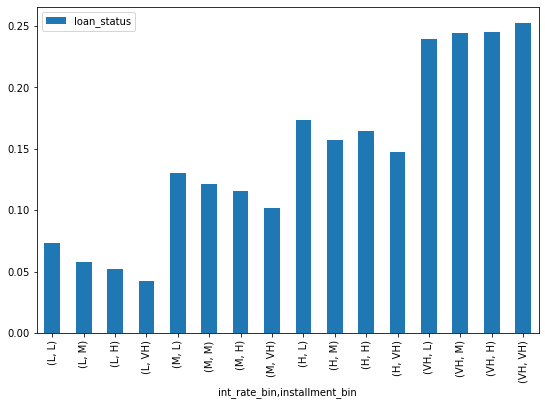

In [37]:
#Default rates for installments for different interest rates
pd.pivot_table(df, index=['int_rate_bin', 'installment_bin'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

#### Observing the above graph we can see that higher interest rates most definitely gives higher default rate.
#### When installments grow higher across different interest rates, the default rate actually decreases, this trend is true till medium interest rates, almost true in the case of high interest rates except in the case of high interest rate and high installment then it is higher than high interest rate and medium installment. Again for high interest rate and very high installment amount the default rate is actually lesser than high interest rate medium installment. This stops becoming true in the case of very high interest rates, where the maximum default rate is seen for very high installment.
### From this observation we may conclude that higher interest rates drive higher default rates rather than higher installment, the inverse is true in the latter's case. People prefer to close off loans by paying higer installment amount in most of the cases, but when any amount of installment combines with very high interest rates it becomes a deadly combination driving to very high default rates at around 25%.

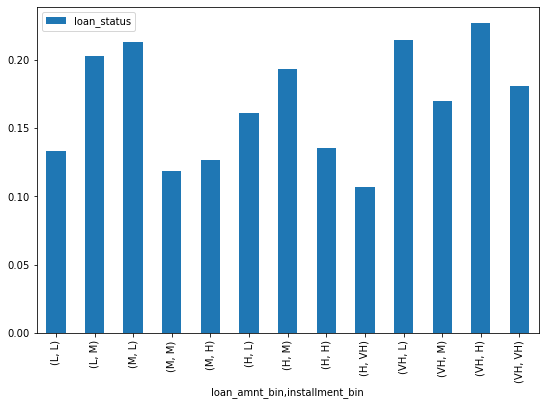

In [38]:
#Default rates for loan amount for different installments
pd.pivot_table(df, index=['loan_amnt_bin', 'installment_bin'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

In [39]:
#Lets see the range of the installment bins
df.groupby('installment_bin')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
installment_bin,,,,,,,,
L,9662.0,108.987864,38.166051,15.69,79.96,111.380,141.72,165.74
M,9628.0,218.871543,32.625216,165.75,190.52,216.925,247.53,277.86
H,9650.0,344.960295,40.244805,277.87,311.11,339.690,378.07,425.55
VH,9637.0,617.472278,161.731054,425.56,491.01,568.140,699.30,1305.19


In [40]:
#Lets see the range of the loan amount bins
df.groupby('loan_amnt_bin')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_amnt_bin,,,,,,,,
L,9664.0,3540.412873,1247.060520,500.0,2500.0,3600.0,4800.0,5300.0
M,9648.0,7300.502695,1183.202490,5325.0,6000.0,7200.0,8000.0,9600.0
H,10645.0,12179.819164,1854.900038,9625.0,10000.0,12000.0,14000.0,15000.0
VH,8620.0,22257.207077,5288.201849,15025.0,18000.0,20000.0,25000.0,35000.0


#### This is an interesting find, we see that very high installment rates for high loan amounts (ranging from 9625 to 15000) actually have the lowest default rates across the whole distribution. Observing the graph, we can see that for large and very large loan amounts, as the installments grow higher from large to very large the deafult rate decreases, for low loan amounts higher installments mean higher default rates, and for medium loans the highest default rate is for the lowest installments, which is among the highest default rate in the distribution.
### So we cannot conclusively say that very high installments amount to higher default rates across loan amounts, rather we can see that very low installments except in the case for the lowest loan amounts has higher default rates across the distribution.

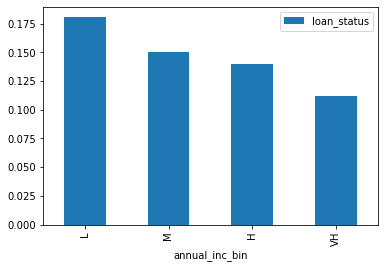

In [41]:
#Lets see the default rate across the annual income distribution
pd.pivot_table(df, index='annual_inc_bin', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

### Higher the annual income lower the default rate.

### <i>Lets see how employment lengths affect the default rate across annual income</i>

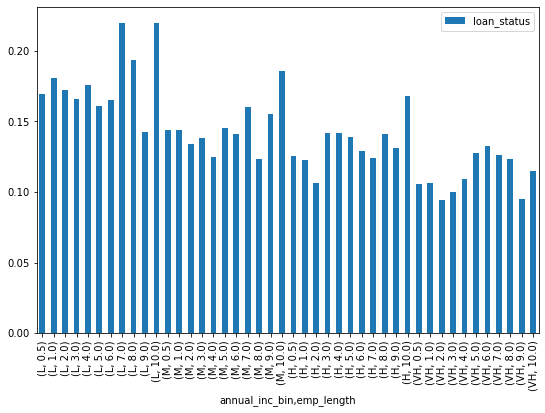

In [42]:
#Default rates for annual income across employment length
pd.pivot_table(df, index=['annual_inc_bin', 'emp_length'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

### As we expected the default rate declines across annual income, but we find some interesting and general trends, wherein across all the annual income bins lower employment length around 2-4 years lower the default rate, later when employment length increases the default rate climbs, peaking at 10+ years except in the case of very high annual income bin.

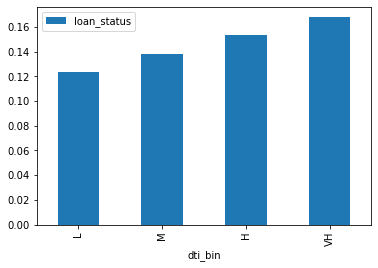

In [43]:
#Let's see the default rate across the dti distribution
pd.pivot_table(df, index='dti_bin', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

### We find as dti increases, higher the default rate.

### <i>Let's see how dti affects default rate across annual income </i>

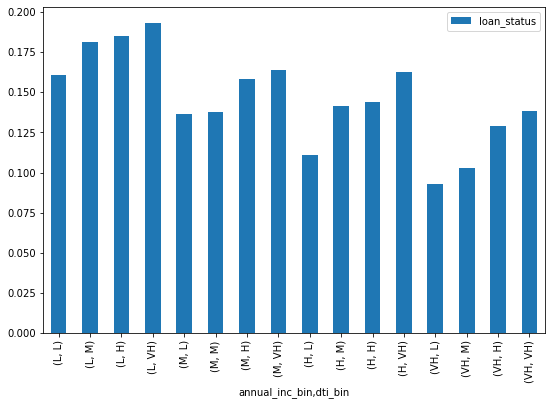

In [44]:
#Default rates for annual income across dti
pd.pivot_table(df, index=['annual_inc_bin', 'dti_bin'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

#### We find out that across the annual income range higher the dti higher the default rate.

### <i>Let's see how dti affects default rate across home ownership status </i>

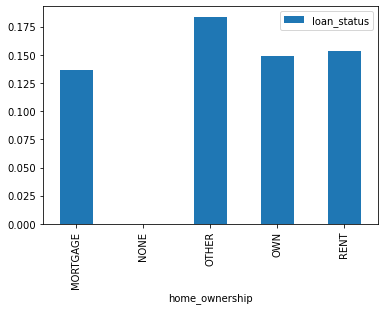

In [45]:
#Lets see the default rate across the home ownership distribution
pd.pivot_table(df, index='home_ownership', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

In [46]:
#Value counts present in home ownership
df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

### Rent and mortage have the highest count, and rent have a bit higher default rate.

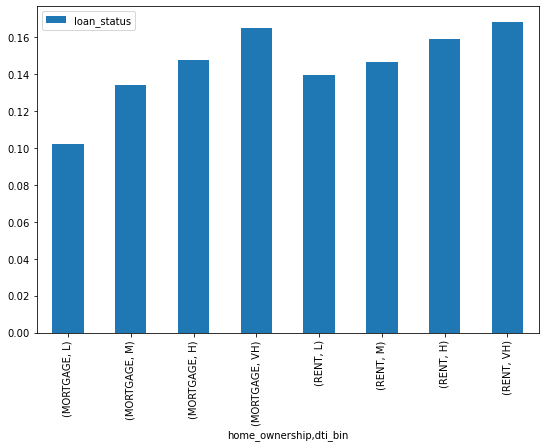

In [47]:
#Default rates for home ownership for 'rent' and 'mortage' across dti
pd.pivot_table(df[(df['home_ownership'] == 'MORTGAGE') | (df['home_ownership'] == 'RENT')], index=['home_ownership', 'dti_bin'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

#### There is increase in default rate across both home ownership as dti increases, but a higher rate of increase in case of Mortgage than rent.
#### For a customer with mortgage home ownership and low dti the default rate is the lowest among the distribution at nearly 10%. For a customer with rent home ownership and very high dti the default rate is the highest among the distribution at above 16%.

In [48]:
#Let's see the distribution of employment titles
df['emp_title'].value_counts()

US Army                           2517
Bank of America                    107
IBM                                 65
AT&T                                57
Kaiser Permanente                   56
                                  ... 
Dr. John C. Perry M.D.               1
hart appliance                       1
Valley Tranportation Authority       1
Blue Wave Car Wash                   1
G4s                                  1
Name: emp_title, Length: 28027, dtype: int64

In [49]:
#We create a new dataframe containing the top 5 employment titles of customers based on their total count
df_top_five_titles = df[df['emp_title'].isin(list(df['emp_title'].value_counts().sort_values(ascending=False)[0:5].keys()))]
df_top_five_titles.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,inq_last_6mths,pub_rec,initial_list_status,policy_code,application_type,loan_amnt_bin,int_rate_bin,installment_bin,annual_inc_bin,dti_bin
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,1,0,f,1,INDIVIDUAL,L,M,L,L,VH
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,2,0,f,1,INDIVIDUAL,L,VH,L,L,M
7,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,2,0,f,1,INDIVIDUAL,M,VH,L,L,L
29,30,1032111,1261745,4375,4375,4375.0,36 months,7.51,136.11,A,...,0,0,f,1,INDIVIDUAL,L,L,L,L,VH
39,42,1069314,1304202,3000,3000,3000.0,36 months,18.25,108.84,D,...,0,0,f,1,INDIVIDUAL,L,VH,L,H,H


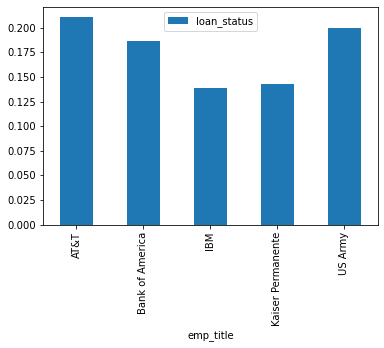

In [50]:
# Let's see the default rate among the top 5 employment titles
pd.pivot_table(df_top_five_titles, index='emp_title', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

#### We can see that customer whose title is IBM has the lowest default rate, and highest for AT&T. But the above graph is inconclusvie as we can see from the value counts for employment title, it is very much spread, thus rendering the above findings to null.

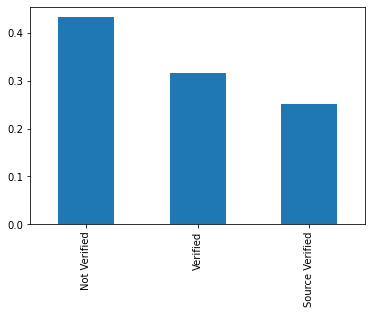

In [51]:
#Let's see the distribution for verification status
(df['verification_status'].value_counts() / len(df)).plot.bar()
plt.show()

### More than 40% of the loans are not verified and over 30% are verified and nearly 25% have their source verified.

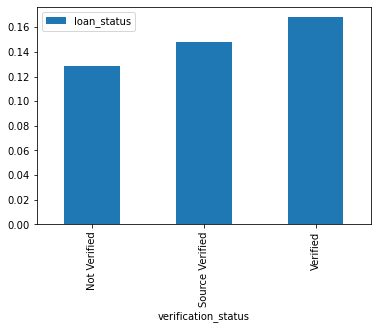

In [52]:
#Let's see the default rate across the verification status distribution
pd.pivot_table(df, index='verification_status', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

### Interestingly not verified has the lowest default rate among verification statuses.

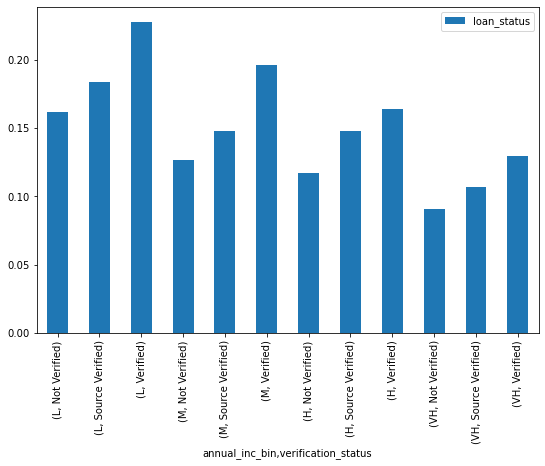

In [53]:
#Default rates for annual income across verification status
pd.pivot_table(df, index=['annual_inc_bin', 'verification_status'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

#### We can see that default rate decreases as annual income increases and within each annual income bin default rate is the highest for Verified, followed by Source Verified and least for not verified. With highest default rate at around 25% for low income verified customer.
### This is not expected, it may point to the question of trustworthiness of verification done by the agent .

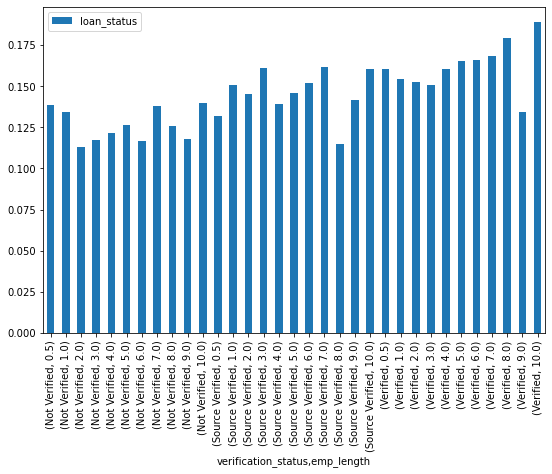

In [54]:
#Default rates for loan term across verification status
pd.pivot_table(df, index=['verification_status', 'emp_length'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

#### We can see for verified customers there is a gradual increase in default rates for employment length greater than 3 years except for 9 years, peaking at 10+ years.  

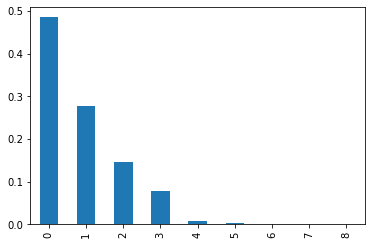

In [55]:
#Let's examine inquiries last 6 months
(df['inq_last_6mths'].value_counts() / len(df)).plot.bar()
plt.show()

In [56]:
(df['inq_last_6mths'].value_counts() / len(df)).sort_values(ascending=False)[0:4].sum()

0.9851984343002307

### We can see that the top 4 values constitute 98% of the data, we can use them for further analysis

In [57]:
#We create a new dataframe filtering by the top 4 counts for inquiries
df_top_four_inq = df[df['inq_last_6mths'].isin(list(df['inq_last_6mths'].value_counts().sort_values(ascending=False)[0:4].keys()))]
df_top_four_inq.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,inq_last_6mths,pub_rec,initial_list_status,policy_code,application_type,loan_amnt_bin,int_rate_bin,installment_bin,annual_inc_bin,dti_bin
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,1,0,f,1,INDIVIDUAL,L,M,L,L,VH
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,2,0,f,1,INDIVIDUAL,L,VH,L,L,M
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,1,0,f,1,INDIVIDUAL,H,H,H,M,VH
4,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,3,0,f,1,INDIVIDUAL,L,L,L,L,M
5,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,1,0,f,1,INDIVIDUAL,M,VH,M,M,VH


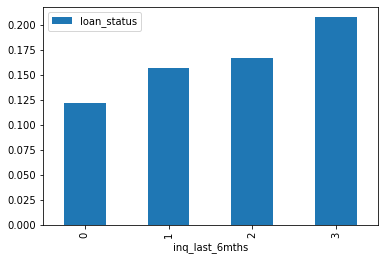

In [58]:
#Let's see the default rate for the top 4 inq_last_6mths distribution
pd.pivot_table(df_top_four_inq, index='inq_last_6mths', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

### We see that default rate increases almost linearly with 3 having the highest.

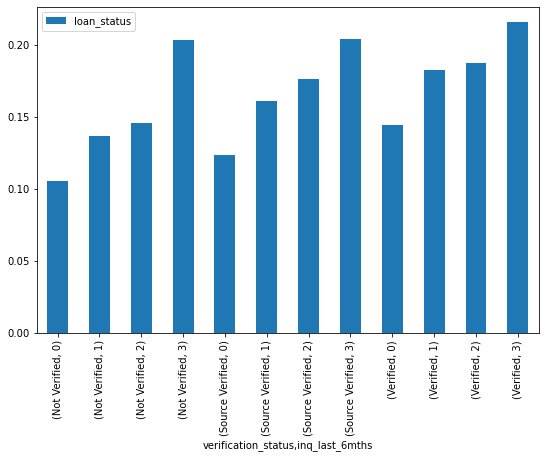

In [59]:
#Default rates for loan term across verification status
pd.pivot_table(df_top_four_inq, index=['verification_status', 'inq_last_6mths'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

### We can see that default rate is the highest when there are 3 inquiries in the past 6 months across all verification statuses. But across verified and source verified status the default rate is higher across all counts of inquiries than non verified where the significant jump happens only when inquiries equals three.

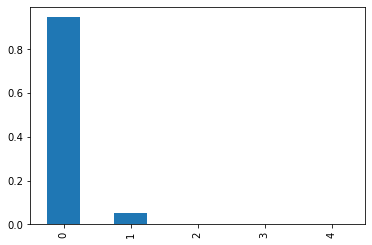

In [60]:
#Let's examine public records column
(df['pub_rec'].value_counts() / len(df)).plot.bar()
plt.show()

### Nearly 90% of the data lies in the bin at 0. Almost 90% of the applicants have 0 public records.

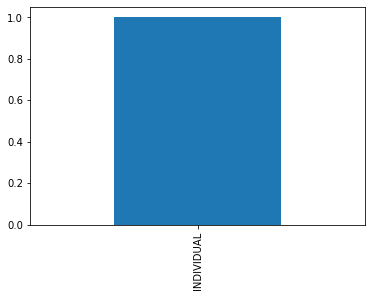

In [61]:
#Let's examine application type column
(df['application_type'].value_counts() / len(df)).plot.bar()
plt.show()

### Almost all of the applicants are individuals.

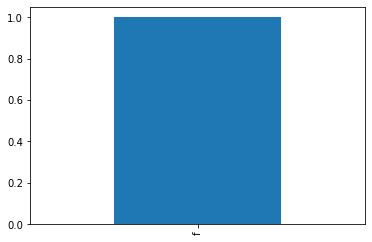

In [62]:
#Let's examine initial_list_status column
(df['initial_list_status'].value_counts() / len(df)).plot.bar()
plt.show()

### We see that almost all records have initial list status as 'f'.

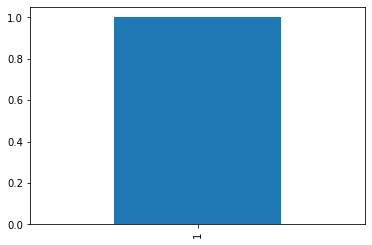

In [63]:
#Let's examine policy_code column
(df['policy_code'].value_counts() / len(df)).plot.bar()
plt.show()

### We see that almost all records have policy code as 1.

In [64]:
#Distribution of loans according to the zipcodes
df['zip_code'].value_counts()

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
747xx      1
523xx      1
397xx      1
831xx      1
689xx      1
Name: zip_code, Length: 822, dtype: int64

### We see that zip_code is much spread across 822 variables.

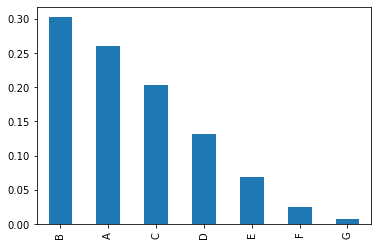

In [65]:
#Let's examine grade column
(df['grade'].value_counts() / len(df)).plot.bar()
plt.show()

### We can select the top 5 grades by count, count for 'F' and 'G' are insignificant.

In [66]:
#We create a new dataframe filtering by the top 5 grades by count
df_top_five_grades = df[df['grade'].isin(list(df['grade'].value_counts().sort_values(ascending=False)[0:5].keys()))]
df_top_five_grades.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,inq_last_6mths,pub_rec,initial_list_status,policy_code,application_type,loan_amnt_bin,int_rate_bin,installment_bin,annual_inc_bin,dti_bin
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,1,0,f,1,INDIVIDUAL,L,M,L,L,VH
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,5,0,f,1,INDIVIDUAL,L,VH,L,L,L
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,2,0,f,1,INDIVIDUAL,L,VH,L,L,M
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,1,0,f,1,INDIVIDUAL,H,H,H,M,VH
4,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,3,0,f,1,INDIVIDUAL,L,L,L,L,M


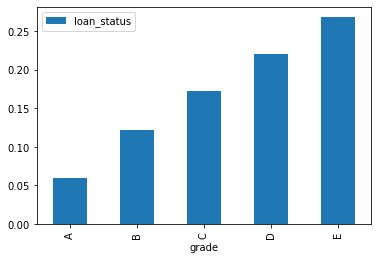

In [67]:
#Lets see the default rate across top 5 grades
pd.pivot_table(df_top_five_grades, index='grade', values='loan_status', aggfunc=np.mean).plot.bar()
plt.show()

### As expected default rates for grades follow a linear distribution starting from grade A to grade E

### <i>Let's see the default rates for grades distribution across the top 7 purposes of loan</i>

In [68]:
#Lets filter df_top_seven_purp for the top 5 grades
df_top_seven_purp_upd = df_top_seven_purp[df_top_seven_purp['grade'].isin(list(df['grade'].value_counts().sort_values(ascending=False)[0:5].keys()))]
df_top_seven_purp_upd.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,inq_last_6mths,pub_rec,initial_list_status,policy_code,application_type,loan_amnt_bin,int_rate_bin,installment_bin,annual_inc_bin,dti_bin
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,1,0,f,1,INDIVIDUAL,L,M,L,L,VH
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,5,0,f,1,INDIVIDUAL,L,VH,L,L,L
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,2,0,f,1,INDIVIDUAL,L,VH,L,L,M
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,1,0,f,1,INDIVIDUAL,H,H,H,M,VH
5,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,1,0,f,1,INDIVIDUAL,M,VH,M,M,VH


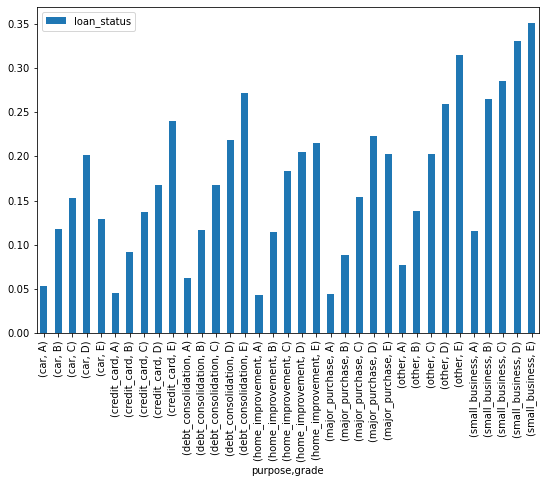

In [69]:
#Default rates for grades distribution across the top 7 purposes of loan
pd.pivot_table(df_top_seven_purp_upd, index=['purpose', 'grade'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

### We see across data set with top 7 loan purposes generally the default rate increases alphabetically according to the grade. But we see a spike in default rates for small businesses from grade B onwards, more than 25% reaching upto 35% when it reaches grade E.

### <i>Since grades 'F' and 'G' have very low count we will take the top 5 grades for analysing their subgrades</i>

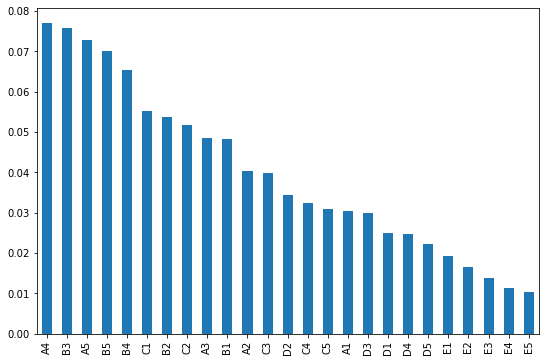

In [70]:
    #Let's examine sub_grade column for the top 5 grades
(df_top_five_grades['sub_grade'].value_counts() / len(df_top_five_grades)).plot.bar(figsize=(9,6))
plt.show()

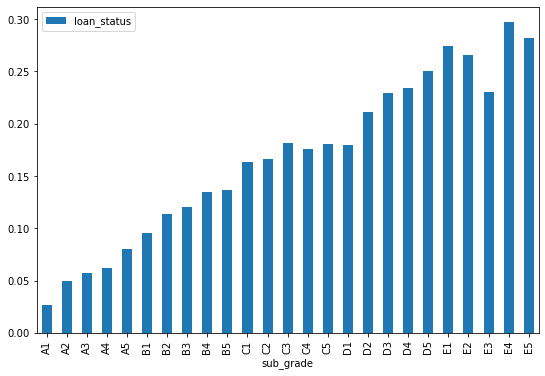

In [71]:
#Lets see the default rate across sub_grades
pd.pivot_table(df_top_five_grades, index='sub_grade', values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

### We see that the graph is pretty linear except for some rise and dips within the grades. The sub grades of E, seems to have this more prominently.

### <i>Let's see the default rates for sub grades distribution across the top 3 purposes of loan, we select the top 3 since further sampling can lead to unreliable results</i>

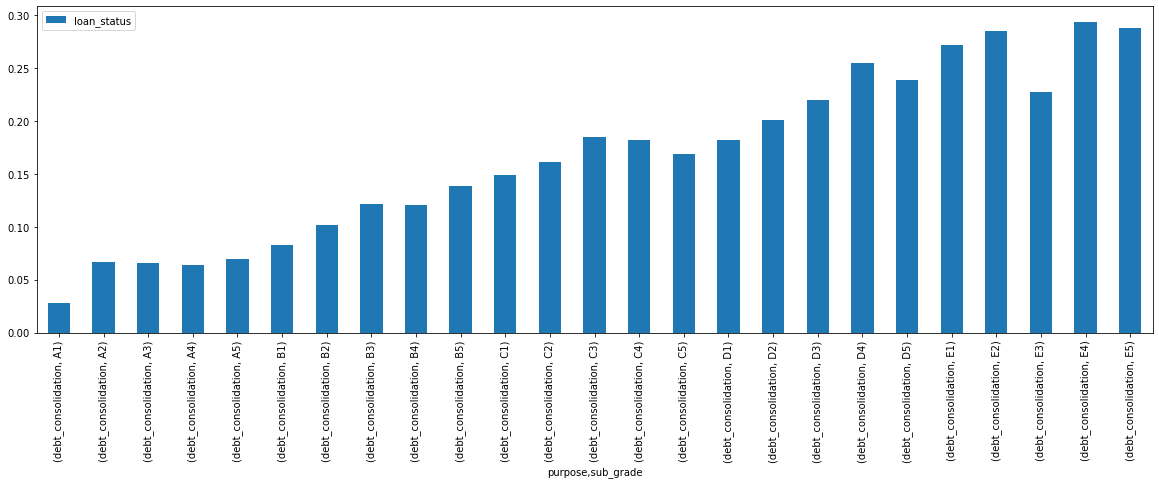

In [72]:
#Default rates for grades distribution across debt consolidation
pd.pivot_table(df_top_seven_purp_upd[df_top_seven_purp_upd['purpose'] == 'debt_consolidation'], index=['purpose', 'sub_grade'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(20,6))
plt.show()

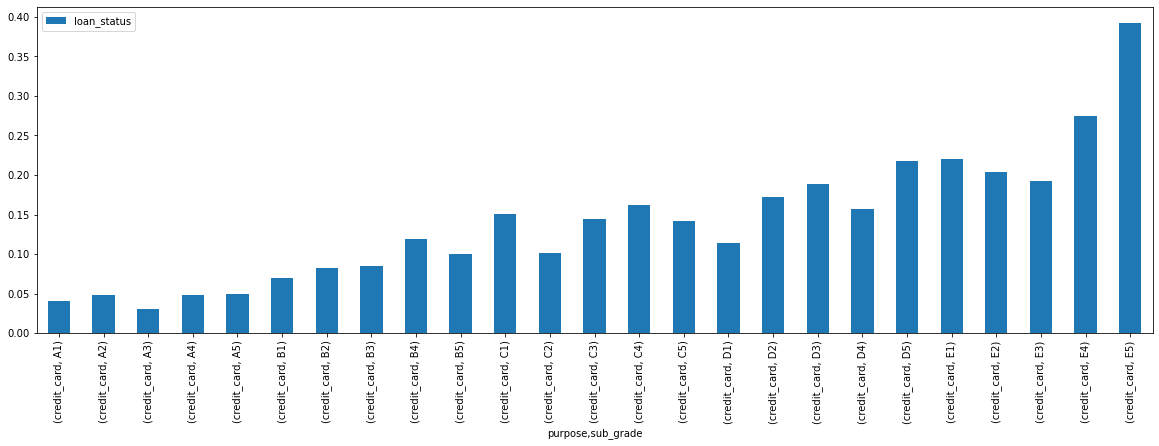

In [73]:
#Default rates for grades distribution across debt credit_card
pd.pivot_table(df_top_seven_purp_upd[df_top_seven_purp_upd['purpose'] == 'credit_card'], index=['purpose', 'sub_grade'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(20,6))
plt.show()

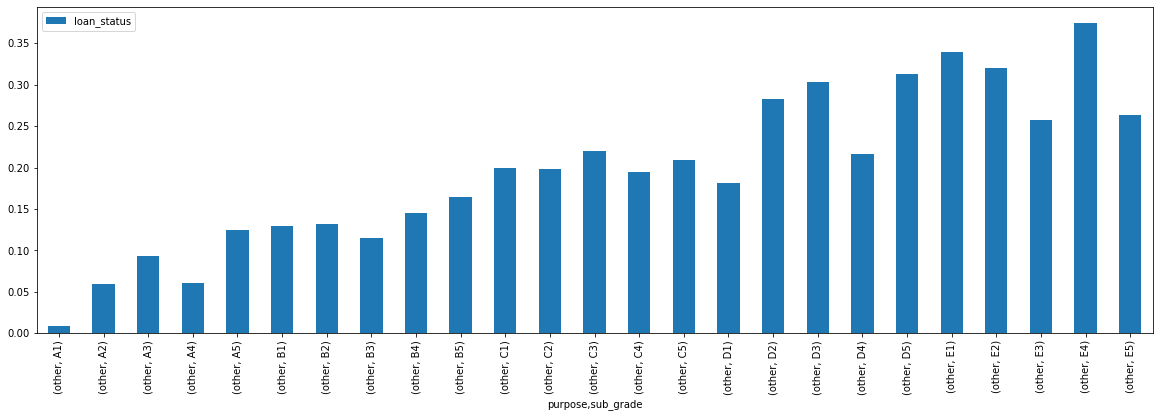

In [74]:
#Default rates for grades distribution across debt other
pd.pivot_table(df_top_seven_purp_upd[df_top_seven_purp_upd['purpose'] == 'other'], index=['purpose', 'sub_grade'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(20,6))
plt.show()

### We can see that default rate increases across all the three loan purposes as grade changes, but within the grade the sub grades do not follow a linear increase, this becomes very much visible in the third loan purpose. Within a grade sub grades starts increasing then dips, this keeps repeating and becomes much more non uniform as the grade increases. When we look at the default rates for sub grades this behaviour seems to be in congruence, as sub grades start deviating from linear form as grade increases, this maybe due to lower number of higher grades and sub grades.

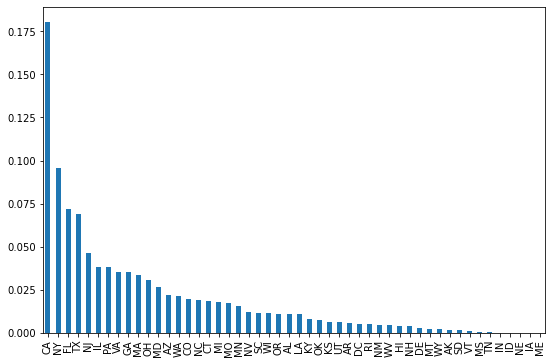

In [75]:
#Distribution of loans according to the states
(df['addr_state'].value_counts() / len(df)).plot.bar(figsize=(9,6))
plt.show()

### The distribution is very much spread, let's take the top 4 values for further analysis.

In [76]:
#We create a new dataframe filtering by the top 4 states by count
df_top_four_states = df[df['addr_state'].isin(list(df['addr_state'].value_counts().sort_values(ascending=False)[0:4].keys()))]
df_top_four_states.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,inq_last_6mths,pub_rec,initial_list_status,policy_code,application_type,loan_amnt_bin,int_rate_bin,installment_bin,annual_inc_bin,dti_bin
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,1,0,f,1,INDIVIDUAL,H,H,H,M,VH
6,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,2,0,f,1,INDIVIDUAL,L,VH,L,M,L
7,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,2,0,f,1,INDIVIDUAL,M,VH,L,L,L
8,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,0,0,f,1,INDIVIDUAL,M,H,L,L,H
10,11,1069908,1305008,12000,12000,12000.0,36 months,12.69,402.54,B,...,0,0,f,1,INDIVIDUAL,H,H,H,H,M


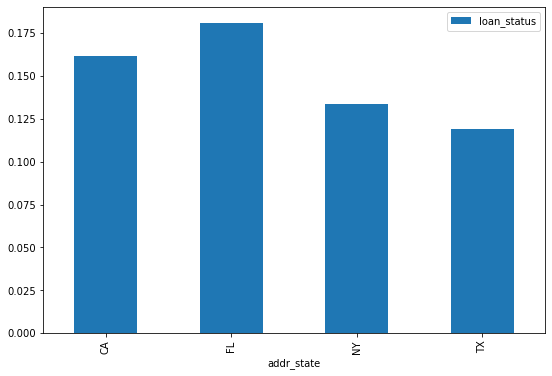

In [77]:
#Default rates for top 4 states
pd.pivot_table(df_top_four_states, index='addr_state', values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

### We can see that default rate is higher for customers from Florida compared to others.

In [78]:
#Lets filter df_top_seven_purp for the top 4 states
df_top_seven_purp_state = df_top_seven_purp[df_top_seven_purp['addr_state'].isin(list(df['addr_state'].value_counts().sort_values(ascending=False)[0:4].keys()))]
df_top_seven_purp_state.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,inq_last_6mths,pub_rec,initial_list_status,policy_code,application_type,loan_amnt_bin,int_rate_bin,installment_bin,annual_inc_bin,dti_bin
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,1,0,f,1,INDIVIDUAL,H,H,H,M,VH
6,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,2,0,f,1,INDIVIDUAL,L,VH,L,M,L
7,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,2,0,f,1,INDIVIDUAL,M,VH,L,L,L
8,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,0,0,f,1,INDIVIDUAL,M,H,L,L,H
10,11,1069908,1305008,12000,12000,12000.0,36 months,12.69,402.54,B,...,0,0,f,1,INDIVIDUAL,H,H,H,H,M


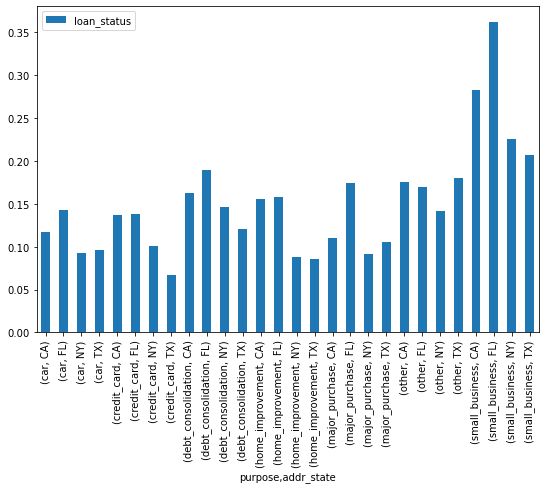

In [79]:
#Default rates for states distribution across the top 7 purposes of loan
pd.pivot_table(df_top_seven_purp_state, index=['purpose', 'addr_state'], values='loan_status', aggfunc=np.mean).plot.bar(figsize=(9,6))
plt.show()

### We can get very useful insights for the distribution of default rate across top 4 states for the top 7 purposes of loans. Most purposes have the highest default rate in Florida, in par with our above findings, except for other purpose where California seems to have a slight edge over Florida.